In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r'Sample - Superstore.csv', encoding= 'unicode_escape')

In [3]:
df.shape

(9994, 21)

In [4]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-2016,16-06-2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-2015,18-10-2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
pd.isnull(df).sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [10]:
df['Sales'] = df['Sales'].astype('int')

In [11]:
df['Profit'] = df['Profit'].astype('int')

In [13]:
df['Discount'] = df['Discount'].astype('int')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Row ID         9994 non-null   int64 
 1   Order ID       9994 non-null   object
 2   Order Date     9994 non-null   object
 3   Ship Date      9994 non-null   object
 4   Ship Mode      9994 non-null   object
 5   Customer ID    9994 non-null   object
 6   Customer Name  9994 non-null   object
 7   Segment        9994 non-null   object
 8   Country        9994 non-null   object
 9   City           9994 non-null   object
 10  State          9994 non-null   object
 11  Postal Code    9994 non-null   int64 
 12  Region         9994 non-null   object
 13  Product ID     9994 non-null   object
 14  Category       9994 non-null   object
 15  Sub-Category   9994 non-null   object
 16  Product Name   9994 non-null   object
 17  Sales          9994 non-null   int32 
 18  Quantity       9994 non-null

In [27]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

# SEGMENT

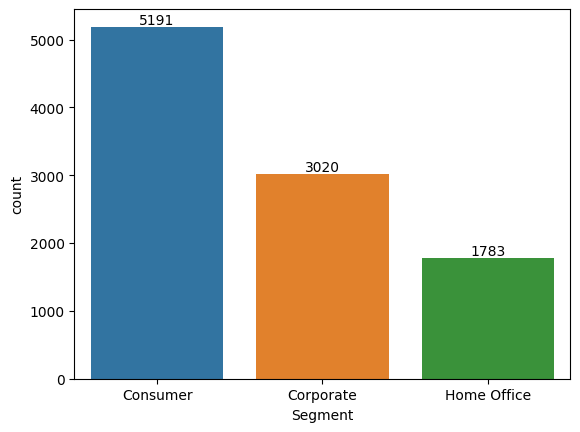

In [31]:
ax = sns.countplot(x = 'Segment',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Segment', ylabel='Sales'>

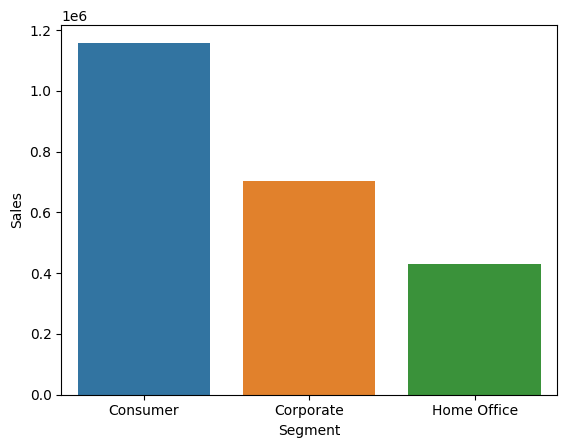

In [32]:
sales_seg = df.groupby(['Segment'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)

sns.barplot(x = 'Segment',y= 'Sales' ,data = sales_seg)

<Axes: xlabel='Region', ylabel='Sales'>

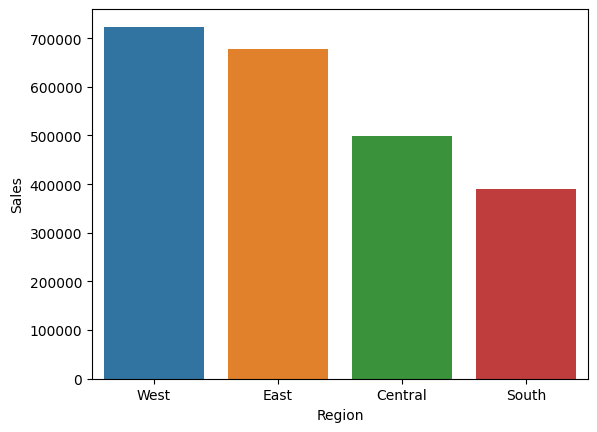

In [33]:
sales_reg = df.groupby(['Region'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)

sns.barplot(x = 'Region',y= 'Sales' ,data = sales_reg)

From this we can conclude that the consumer segment has the highest sales and the west region has the highest sales.


# STATES

<Axes: xlabel='State', ylabel='Profit'>

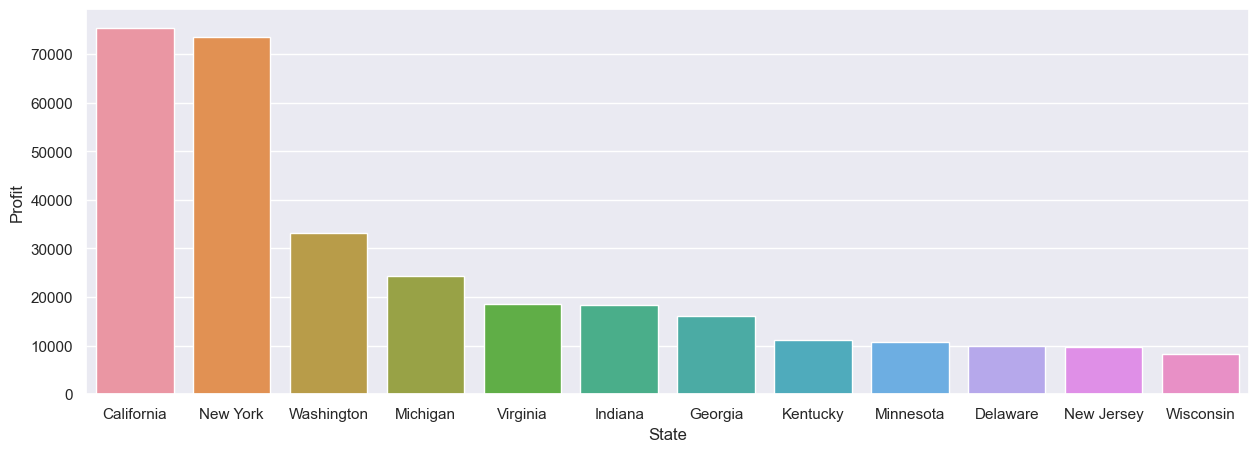

In [38]:
sales_state = df.groupby(['State'], as_index=False)['Profit'].sum().sort_values(by='Profit', ascending=False).head(12)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Profit')

# SHIP MODE


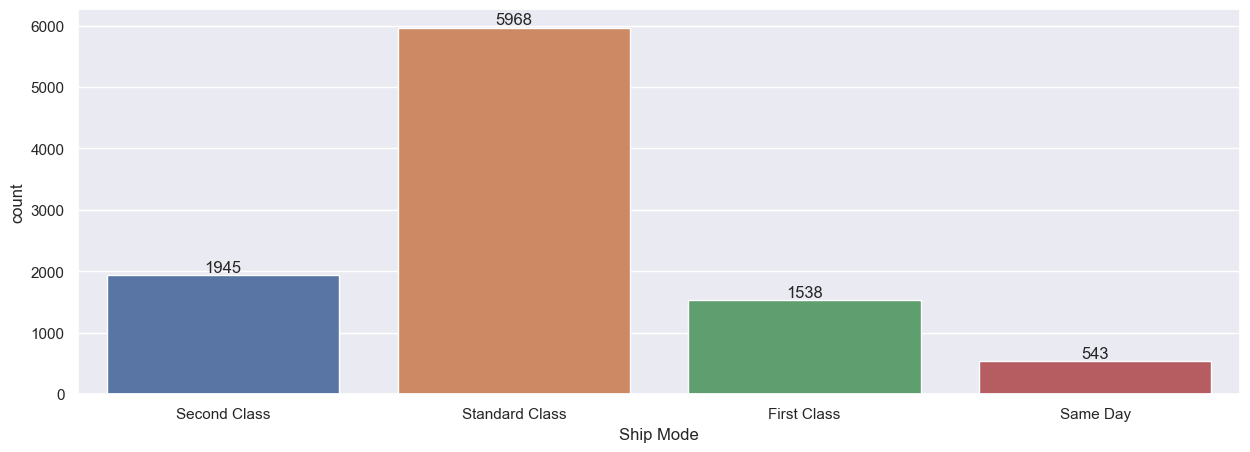

In [40]:
ax = sns.countplot(x = 'Ship Mode',data = df)

for bars in ax.containers:
    ax.bar_label(bars)

From this we can conclude consumers perfer standard Class shipping mode.